The name of top 4 colors in image are:  

1. #bad5ea = Pale Aqua
2. #2f1108 = Zinnwaldite Brown
3. #a04218 = Chinese Red
4. #76a7e1 = Iceberg




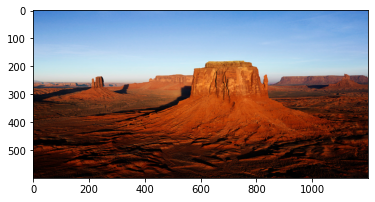

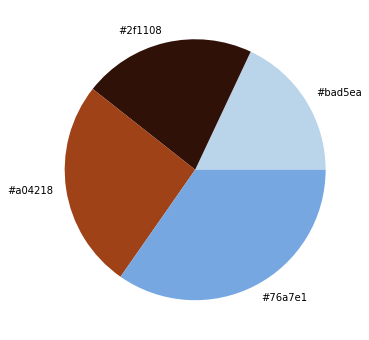

In [2]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
from array import *
%matplotlib inline


In_user = int(input("Enter the numer of colors: ")) 
number_of_colors = In_user 
show_chart = True

#Specifing path for image and csv file(contains all color names and ther RGB & HEX values) 
img_path = r"C:\Users\PUNIT\Desktop\PYTHON_proj\Desert.jpg"
csv_path = r'C:\Users\PUNIT\Desktop\PYTHON_proj\colors.csv'

#Reading csv file
index = ['color', 'color_name', 'hex', 'R', 'G', 'B']
df = pd.read_csv(csv_path, names=index, header=None)

#Load image
Load_image=r"C:\Users\PUNIT\Desktop\PYTHON_proj\Desert.jpg"
image = cv2.imread(Load_image)
# print("The type of this input is {}".format(type(image)))
# print("Shape: {}".format(image.shape))
plt.imshow(image)

''' 
Here o/p will be (if we print):
The type of this input is <class 'numpy.ndarray'>
Shape: (3456, 4608, 3)

'''

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

#To conv rgb values to hex
def RGB2HEX(color):
        return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

#To get image path         
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

#function to calculate minimum distance from all colors and get the most matching color from csv file
def get_color_name(R,G,B):
	minimum = 1000
	for i in range(len(df)):
		d = abs(R - int(df.loc[i,'R'])) + abs(G - int(df.loc[i,'G'])) + abs(B - int(df.loc[i,'B']))
		if d <= minimum:
			minimum = d
			cname = df.loc[i, 'color_name']

	return cname

modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)
counts = Counter(labels)
center_colors = clf.cluster_centers_

# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[j] for j in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[j]) for j in counts.keys()]
rgb_colors = [ordered_colors[j] for j in counts.keys()]
 
#Initialize array     
array = rgb_colors     
print(f"The name of top {number_of_colors} colors in image are:  \n")  
#Loop through the array by incrementing the value of i     
for i in range(0, len(array)):
     array_num = array[i]                                        # array 
     List = array_num.tolist()                                   # converts array to list  
     text = get_color_name(List[0],List[1],List[2])              #sends R,G,B from list 'a' to function 'get_color_name'
     dummy_variable=text
     inc=i+1
     print (f"{inc}. {hex_colors[i]} = {dummy_variable}")

#To print extra new line after colors 
print("\n") 
 
#TO plot the final pie chart 
if (show_chart):
  plt.figure(figsize = (8, 6))
  plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
     

 